In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [62]:
import nltk
from tethne.readers import zotero
import matplotlib.pyplot as plt
from helpers import normalize_token, filter_token
import networkx as nx

In [5]:
text_root = '../data/SystemsBiology/'
documents = nltk.corpus.PlaintextCorpusReader(text_root, '.+.txt')

In [28]:
tagged_words = nltk.pos_tag(documents.words())

In [29]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(tagged_words)

In [30]:
def filter_taggedtoken(tagged_token):
    token, tag = tagged_token
    return token.isalpha() and tag.startswith('N')

In [31]:
finder.apply_freq_filter(3)
finder.apply_word_filter(lambda token: not filter_taggedtoken(token))
finder.nbest(bigram_measures.pmi, 10)

[((u'United', 'NNP'), (u'States', 'NNPS')),
 ((u'glyoxylate', 'NN'), (u'shunt', 'NN')),
 ((u'vice', 'NN'), (u'versa', 'NN')),
 ((u'Karger', 'NNP'), (u'AG', 'NNP')),
 ((u'reading', 'NN'), (u'frames', 'NNS')),
 ((u'warning', 'NN'), (u'signs', 'NNS')),
 ((u'Northern', 'NNP'), (u'bobwhite', 'NN')),
 ((u'desorption', 'NN'), (u'ionization', 'NN')),
 ((u'guinea', 'NN'), (u'pigs', 'NNS')),
 ((u'Mycobacterium', 'NNP'), (u'tuberculosis', 'NN'))]

In [33]:
finder.nbest(bigram_measures.likelihood_ratio, 20)

[((u'systems', 'NNS'), (u'biology', 'NN')),
 ((u'All', 'NNP'), (u'rights', 'NNS')),
 ((u'gene', 'NN'), (u'expression', 'NN')),
 ((u'mass', 'NN'), (u'spectrometry', 'NN')),
 ((u'AB', 'NNP'), (u'Background', 'NNP')),
 ((u'Systems', 'NNP'), (u'Biology', 'NNP')),
 ((u'Elsevier', 'NNP'), (u'Ltd', 'NNP')),
 ((u'Elsevier', 'NNP'), (u'B', 'NNP')),
 ((u'drug', 'NN'), (u'discovery', 'NN')),
 ((u'data', 'NNS'), (u'sets', 'NNS')),
 ((u'Elsevier', 'NNP'), (u'Inc', 'NNP')),
 ((u'Saccharomyces', 'NNP'), (u'cerevisiae', 'NN')),
 ((u'Systems', 'NNPS'), (u'biology', 'NN')),
 ((u'growth', 'NN'), (u'factor', 'NN')),
 ((u'AB', 'NNP'), (u'Systems', 'NNPS')),
 ((u'biology', 'NN'), (u'approach', 'NN')),
 ((u'transcription', 'NN'), (u'factors', 'NNS')),
 ((u'Monte', 'NNP'), (u'Carlo', 'NNP')),
 ((u'Systems', 'NNPS'), (u'Biology', 'NNP')),
 ((u'stem', 'NN'), (u'cell', 'NN'))]

In [34]:
ngram, score = zip(*[g for g in finder.score_ngrams(bigram_measures.pmi)])

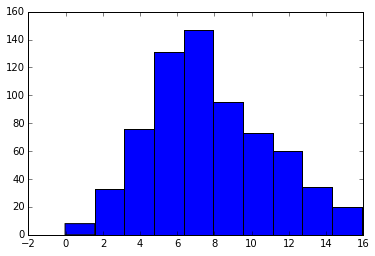

In [35]:
plt.hist(score)
plt.show()

In [37]:
selected_ngrams = [ngram for ngram in finder.above_score(bigram_measures.pmi, 0.0)]
selected_ngrams[-20:]

[((u'expression', 'NN'), (u'network', 'NN')),
 ((u'expression', 'NN'), (u'models', 'NNS')),
 ((u'systems', 'NNS'), (u'approaches', 'NNS')),
 ((u'biology', 'NN'), (u'methods', 'NNS')),
 ((u'analysis', 'NN'), (u'approaches', 'NNS')),
 ((u'cell', 'NN'), (u'analysis', 'NN')),
 ((u'cell', 'NN'), (u'gene', 'NN')),
 ((u'cell', 'NN'), (u'model', 'NN')),
 ((u'biology', 'NN'), (u'level', 'NN')),
 ((u'expression', 'NN'), (u'networks', 'NNS')),
 ((u'control', 'NN'), (u'systems', 'NNS')),
 ((u'system', 'NN'), (u'biology', 'NN')),
 ((u'biology', 'NN'), (u'models', 'NNS')),
 ((u'model', 'NN'), (u'networks', 'NNS')),
 ((u'network', 'NN'), (u'data', 'NNS')),
 ((u'network', 'NN'), (u'biology', 'NN')),
 ((u'model', 'NN'), (u'systems', 'NNS')),
 ((u'systems', 'NNS'), (u'models', 'NNS')),
 ((u'cell', 'NN'), (u'systems', 'NNS')),
 ((u'biology', 'NN'), (u'data', 'NNS'))]

In [38]:
selected_expressions = []
for (token1, pos1), (token2, pos2) in finder.above_score(bigram_measures.pmi, 1.0):
    selected_expressions.append((token1, token2))

selected_expressions[:10]

[(u'United', u'States'),
 (u'glyoxylate', u'shunt'),
 (u'vice', u'versa'),
 (u'Karger', u'AG'),
 (u'reading', u'frames'),
 (u'warning', u'signs'),
 (u'Northern', u'bobwhite'),
 (u'desorption', u'ionization'),
 (u'guinea', u'pigs'),
 (u'Mycobacterium', u'tuberculosis')]

In [39]:
tokenizer = nltk.MWETokenizer(selected_expressions)

In [41]:
words_with_bigrams = [normalize_token(token).replace('_', ' ')
                        for fileid in documents.fileids()
                        for token in tokenizer.tokenize(documents.words(fileids=[fileid]))
                        if filter_token(token) or '_' in token]

In [49]:
words_with_bigrams[20:30]

[u'information',
 u'extremely',
 u'noisy',
 u'volatile',
 u'environment',
 u'new',
 u'view',
 u'signaling networks',
 u'system',
 u'consisting']

## Co-occurrence network

In [50]:
finder = nltk.collocations.BigramCollocationFinder.from_words(words_with_bigrams, window_size=10)
finder.apply_freq_filter(2)
finder.apply_word_filter(lambda token: not filter_token(token))

In [51]:
finder.nbest(bigram_measures.pmi, 20)

[(u'abacavir', u'thiopurine'),
 (u'acyl', u'thioesters'),
 (u'antiretroviral', u'thiopurine'),
 (u'anubis', u'interfering'),
 (u'ation', u'parp'),
 (u'blend', u'polystyrene'),
 (u'constructionist', u'stance'),
 (u'contemplative', u'stance'),
 (u'creationist', u'stance'),
 (u'cyclic', u'guanosine'),
 (u'ddf', u'archival'),
 (u'ddf', u'frozen'),
 (u'dedicate', u'fujii'),
 (u'dedicate', u'professor'),
 (u'discern', u'stance'),
 (u'fdhjst', u'feng'),
 (u'feng', u'ffdht'),
 (u'feng', u'huo'),
 (u'fujii', u'fellow'),
 (u'fujii', u'postdoctoral')]

In [53]:
pair, score = zip(*finder.score_ngrams(bigram_measures.pmi))

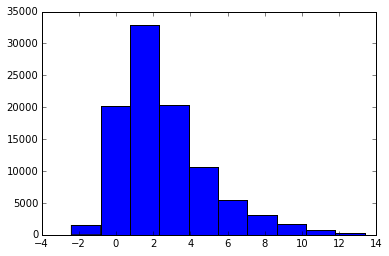

In [54]:
plt.hist(score)
plt.show()

In [103]:
graph = nx.Graph()
for (token1, token2), score in finder.score_ngrams(bigram_measures.pmi):
    if score > 8. and token1 != token2:
        graph.add_edge(token1, token2, weight=score)

In [104]:
# Number of nodes, number of edges.
graph.order(), graph.size(), nx.number_connected_components(graph)

(3387, 3589, 362)

In [105]:
nx.write_graphml(graph, 'colocation.graphml')